## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score


In [2]:
df=pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,102,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
 df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
268/500

0.536

In [6]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

## Model Training

In [12]:
adaboost=AdaBoostClassifier(n_estimators=70)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=70)

In [13]:
# Testing Data 
y_pred = adaboost.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confustion Matrix:\n', cnf_matrix)

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)

clf_report = classification_report(y_test, y_pred)
print(' Classification Report:\n', clf_report)

Confustion Matrix:
 [[113  34]
 [ 35  49]]
Accuracy Score: 0.7012987012987013
 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       147
           1       0.59      0.58      0.59        84

    accuracy                           0.70       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.70      0.70      0.70       231



In [14]:
# Training Data 
y_pred_train = adaboost.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confustion Matrix:\n', cnf_matrix)

acc = accuracy_score(y_train, y_pred_train)
print('Accuracy Score:', acc)

clf_report = classification_report(y_train, y_pred_train)
print(' Classification Report:\n', clf_report)

Confustion Matrix:
 [[323  30]
 [ 47 137]]
Accuracy Score: 0.8566108007448789
 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       353
           1       0.82      0.74      0.78       184

    accuracy                           0.86       537
   macro avg       0.85      0.83      0.84       537
weighted avg       0.85      0.86      0.85       537



In [16]:
adaboost.feature_names_in_

array(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [15]:
adaboost.feature_importances_

array([0.25714286, 0.07142857, 0.07142857, 0.11428571, 0.17142857,
       0.2       , 0.11428571])

In [17]:
s1=pd.Series(adaboost.feature_importances_,index=x.columns)
s1

Glucose                     0.257143
BloodPressure               0.071429
SkinThickness               0.071429
Insulin                     0.114286
BMI                         0.171429
DiabetesPedigreeFunction    0.200000
Age                         0.114286
dtype: float64

<AxesSubplot:>

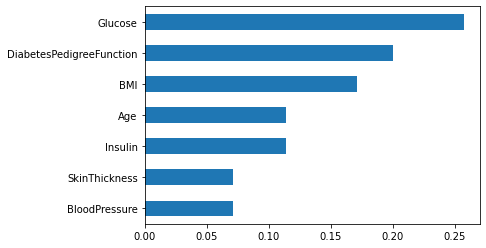

In [18]:
s1.sort_values().plot(kind='barh')